In [50]:
# 1) Data wrangling
# Ensure that the data is clean and free from any missing or incorrect entries.
# Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().
# Include your recommendations for treating missing and incorrect data (dropping the null values or filling them).
# Choose a suitable data wrangling technique—either data standardization or normalization. 
# Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)
# Share your insights regarding the application of the GroupBy() function for either data chunking or merging 
# and offer a recommendation based on your analysis.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Check for missing values
missing_values = data.isna().sum()

# Check for incorrect entries
incorrect_entries = data.describe(include='all')

# Normalize the 'Sales' and 'Unit' columns
scaler = MinMaxScaler()
data[['Unit_Normalized', 'Sales_Normalized']] = scaler.fit_transform(data[['Unit', 'Sales']])

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')


In [52]:
# 2) Data analysis

# Perform descriptive statistical analysis on the data in the Sales and Unit columns. 
# Utilize techniques such as mean, median, mode, and standard deviation for this analysis.
# Identify the group with the highest sales and the group with the lowest sales based on the data provided.
# Identify the group with the highest and lowest sales based on the data provided.
# Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
# (Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)

import pandas as pd
import numpy as np

# Descriptive statistics for 'Sales' and 'Unit'
descriptive_stats = data[['Sales', 'Unit']].agg(['mean', 'median', 'std', 'min', 'max'])

# Identify the group with the highest and lowest sales
highest_sales_group = data.groupby('Group')['Sales'].sum().idxmax()
lowest_sales_group = data.groupby('Group')['Sales'].sum().idxmin()

# Identify the state with the highest and lowest sales
highest_sales_state = data.groupby('State')['Sales'].sum().idxmax()
lowest_sales_state = data.groupby('State')['Sales'].sum().idxmin()

# Daily sales
daily_sales = data.groupby('Date')['Sales'].sum().reset_index()

# Weekly sales
weekly_sales = data.resample('W', on='Date')['Sales'].sum().reset_index()

# Monthly sales
monthly_sales = data.resample('M', on='Date')['Sales'].sum().reset_index()

# Quarterly sales
quarterly_sales = data.resample('Q', on='Date')['Sales'].sum().reset_index()

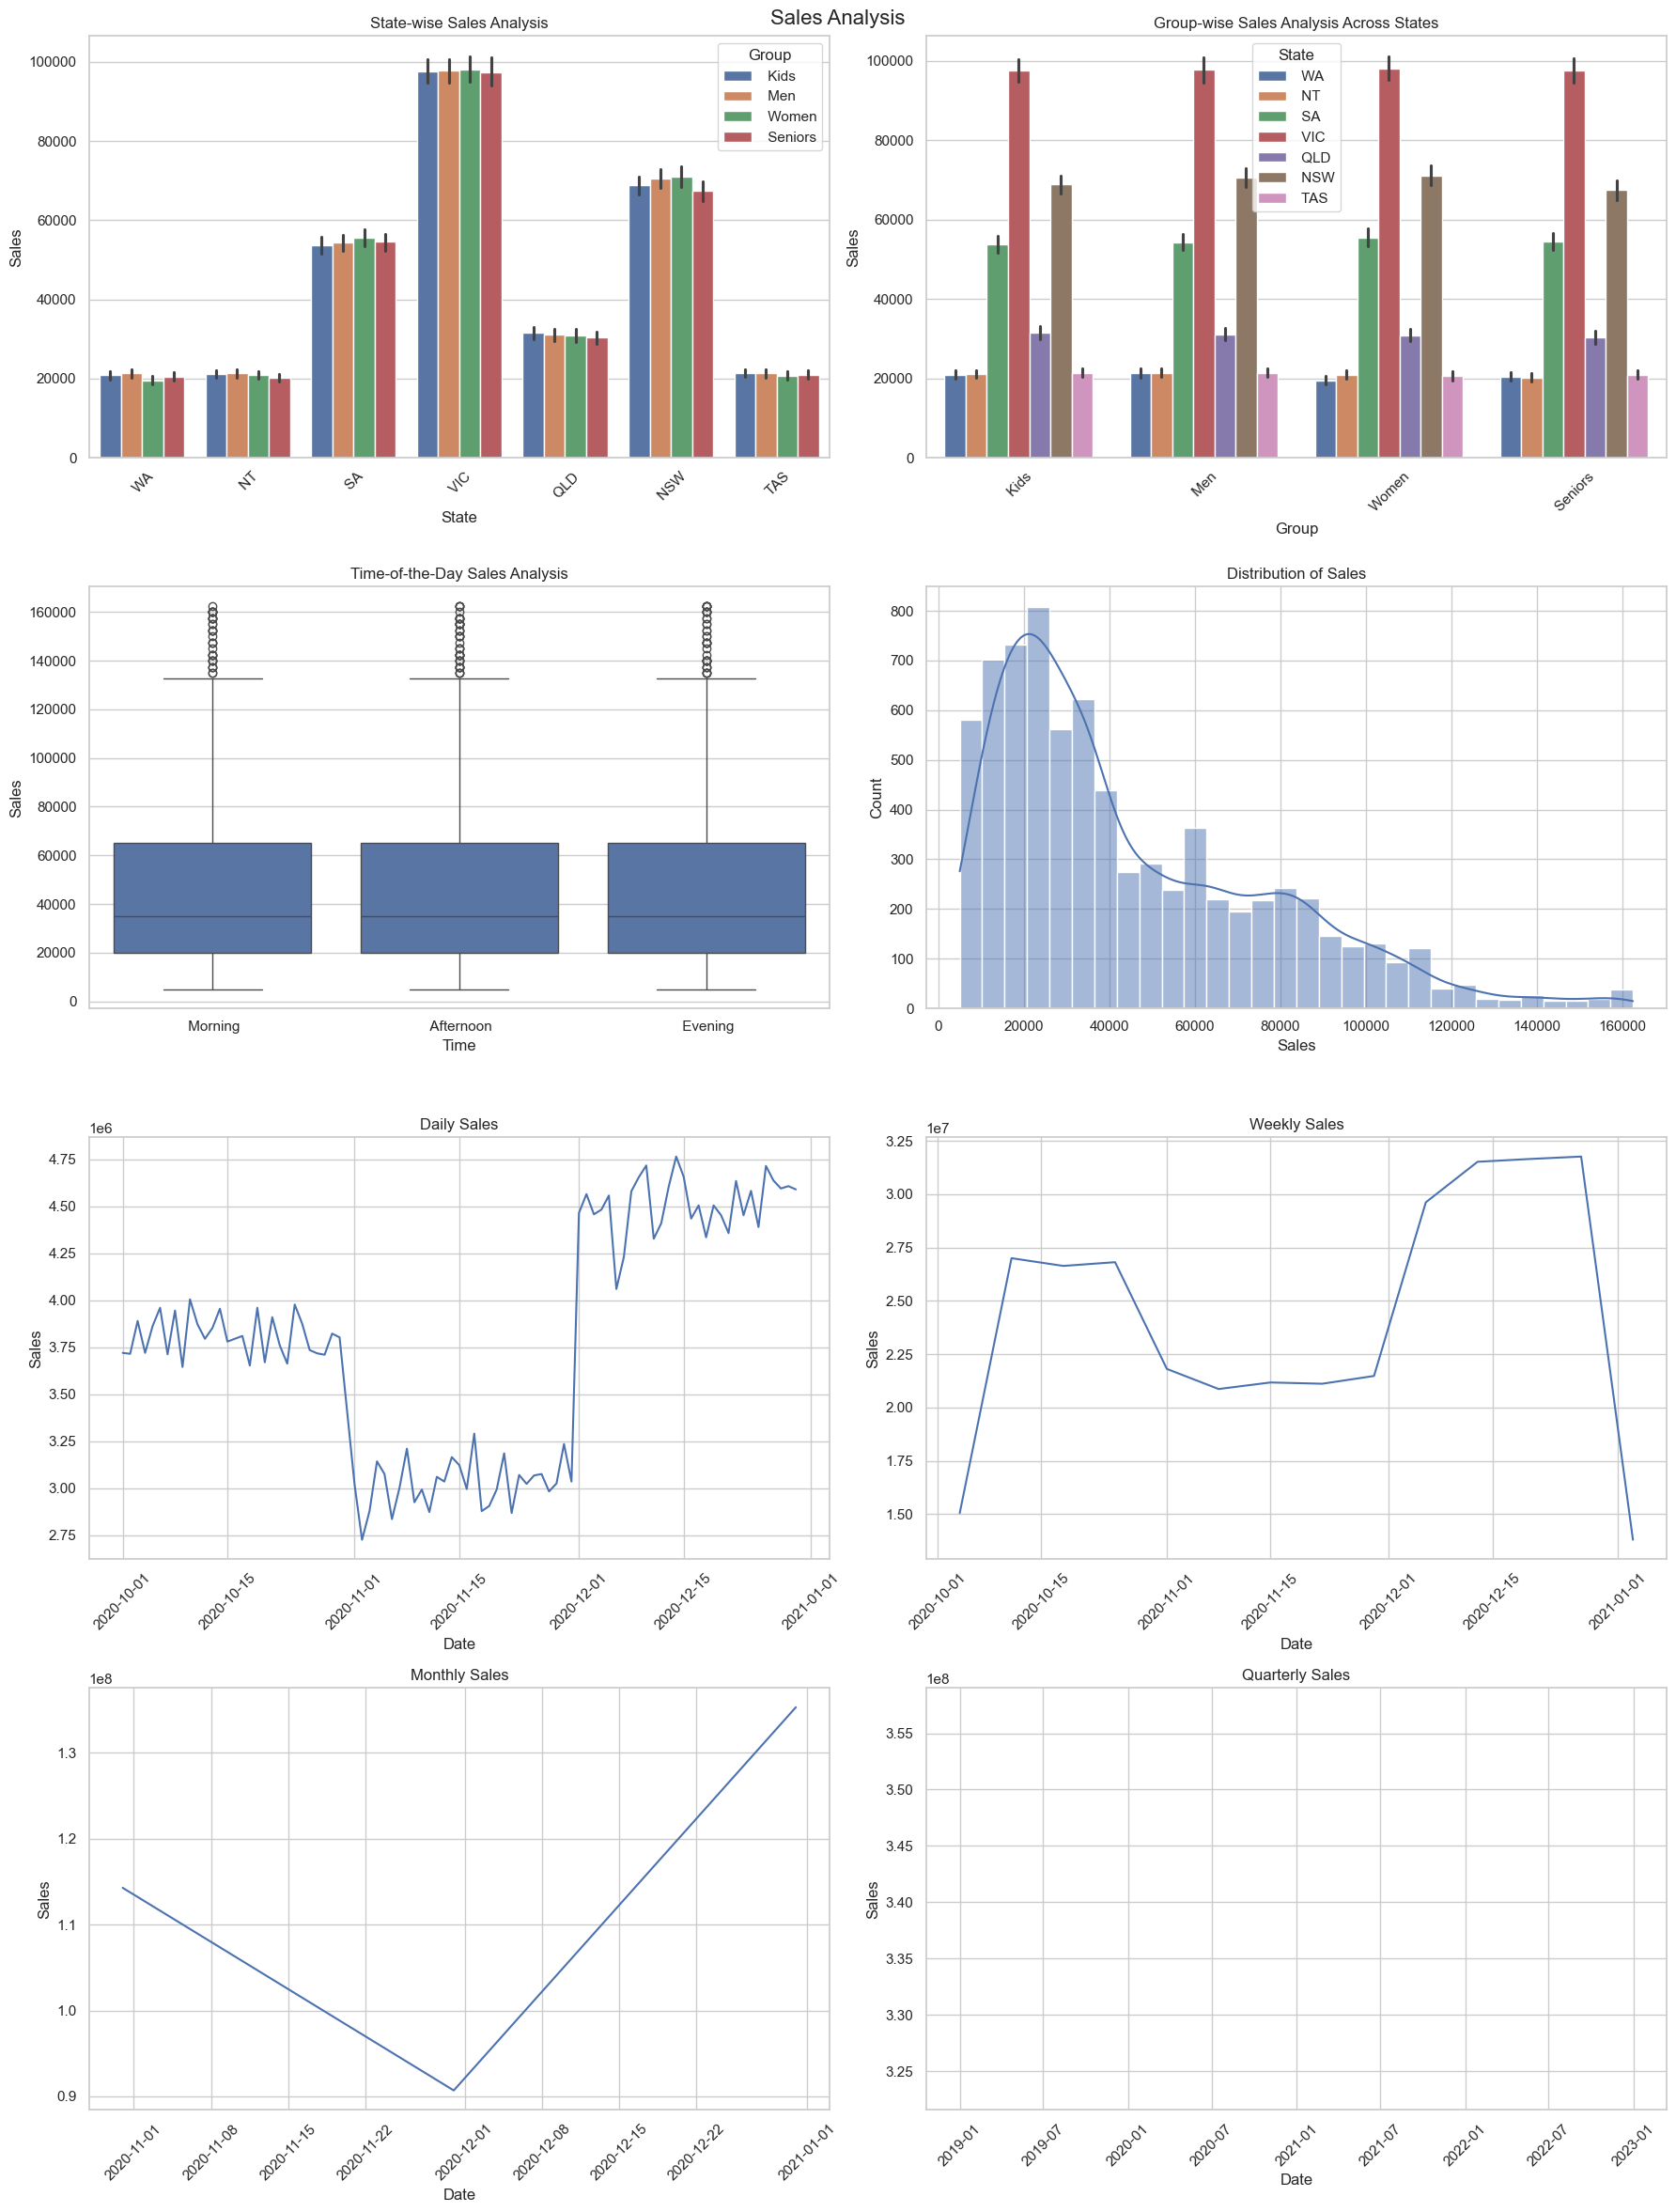

In [56]:
# 3) Data visualization
# Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. 
# The dashboard should encompass key parameters:
# State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
# Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
# Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. 
# This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the plots
fig, axes = plt.subplots(4, 2, figsize=(18, 24))
fig.suptitle('Sales Analysis', fontsize=16)

# State-wise sales analysis
sns.barplot(x='State', y='Sales', hue='Group', data=data, ax=axes[0, 0])
axes[0, 0].set_title('State-wise Sales Analysis')
axes[0, 0].tick_params(axis='x', rotation=45)

# Group-wise sales analysis across states
sns.barplot(x='Group', y='Sales', hue='State', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Group-wise Sales Analysis Across States')
axes[0, 1].tick_params(axis='x', rotation=45)

# Time-of-the-day analysis
sns.boxplot(x='Time', y='Sales', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Time-of-the-Day Sales Analysis')

# Distribution of sales
sns.histplot(data['Sales'], kde=True, ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Distribution of Sales')

# Daily sales plot
sns.lineplot(x='Date', y='Sales', data=daily_sales, ax=axes[2, 0])
axes[2, 0].set_title('Daily Sales')
axes[2, 0].tick_params(axis='x', rotation=45)

# Weekly sales plot
sns.lineplot(x='Date', y='Sales', data=weekly_sales, ax=axes[2, 1])
axes[2, 1].set_title('Weekly Sales')
axes[2, 1].tick_params(axis='x', rotation=45)

# Monthly sales plot
sns.lineplot(x='Date', y='Sales', data=monthly_sales, ax=axes[3, 0])
axes[3, 0].set_title('Monthly Sales')
axes[3, 0].tick_params(axis='x', rotation=45)

# Quarterly sales plot
sns.lineplot(x='Date', y='Sales', data=quarterly_sales, ax=axes[3, 1])
axes[3, 1].set_title('Quarterly Sales')
axes[3, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Data Wrangling

    Missing Values: The dataset does not contain any missing values.
    Incorrect Entries: There are no apparent incorrect entries based on the descriptive statistics.
    Normalization: The 'Sales' and 'Unit' columns were normalized using Min-Max scaling.

Data Analysis
Descriptive Statistics:

    Mean Sales: \$45,013.56
    Median Sales: \$35,000.00
    Standard Deviation of Sales: \$32,253.51
    Minimum Sales: \$5,000.00
    Maximum Sales: \$162,500.00
    Highest and Lowest Sales:

    Group with Highest Sales: Men
    Group with Lowest Sales: Seniors
    State with Highest Sales: VIC
    State with Lowest Sales: WA

Data Visualization

    State-wise Sales Analysis: Shows the sales distribution across different states for each demographic group.
    Group-wise Sales Analysis Across States: Illustrates how each demographic group contributes to sales in different states.
    Time-of-the-Day Sales Analysis: Identifies peak and off-peak sales periods.
    Distribution of Sales: Provides an overview of the sales distribution; highlighting the frequency of different sales amounts.

Recommendations

    Sales Programs: Focus on increasing sales for the Seniors group, particularly in states like WA, where sales are lowest.
    Strategic Planning: Utilize the time-of-the-day analysis to design targeted marketing campaigns during peak sales hours.
    Expansion Opportunities: Consider expanding in states like VIC, which show high sales potential.
